<a href="https://colab.research.google.com/github/DayyalaPranay/DATA-ANALYSIS-USING-PYTHON/blob/main/2203A52013_DAYYALA_PRANAY_DAUP_PROJECT_1__CSV_FILE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, r2_score

In [ ]:
# Load the dataset
df = pd.read_csv("/content/student-por.csv")

In [ ]:
# prompt: Step 3: Outlier Detection & Removal (IQR Method)
# in above dataset

def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered

# Example usage for the 'absences' column:
df_no_outliers = remove_outliers_iqr(df, 'absences')

# Now df_no_outliers contains the data with outliers removed from the 'absences' column.
# Repeat for other numerical columns as needed.
# Example for G1
df_no_outliers = remove_outliers_iqr(df_no_outliers, 'G1')

#Example for G2
df_no_outliers = remove_outliers_iqr(df_no_outliers, 'G2')

#Example for G3
df_no_outliers = remove_outliers_iqr(df_no_outliers, 'G3')


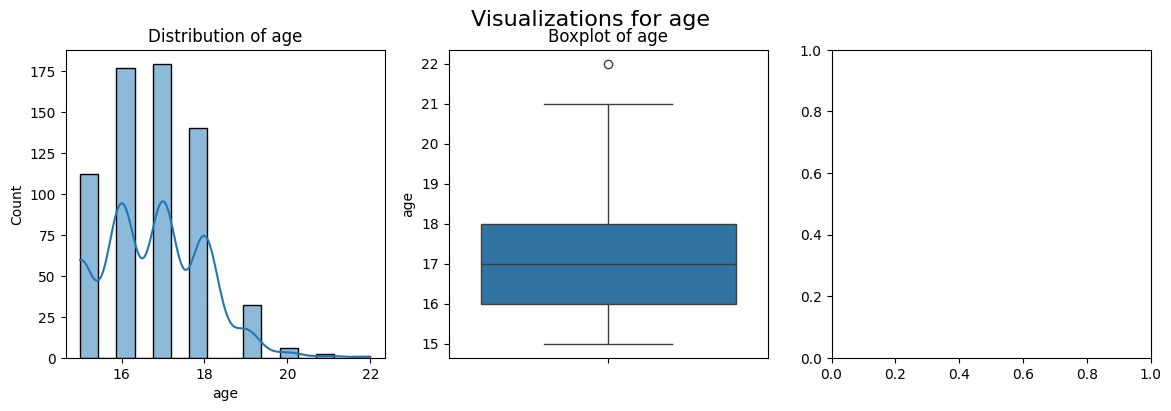

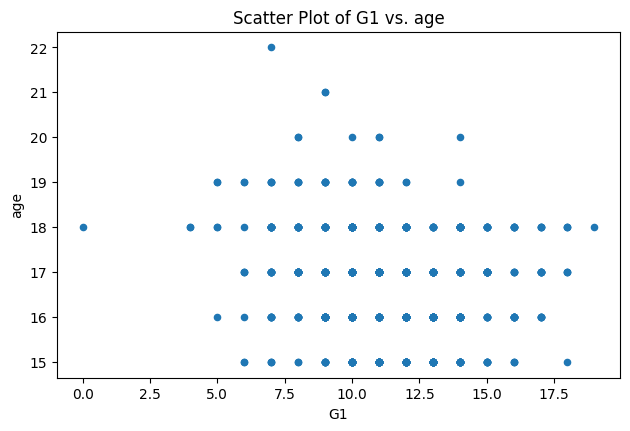

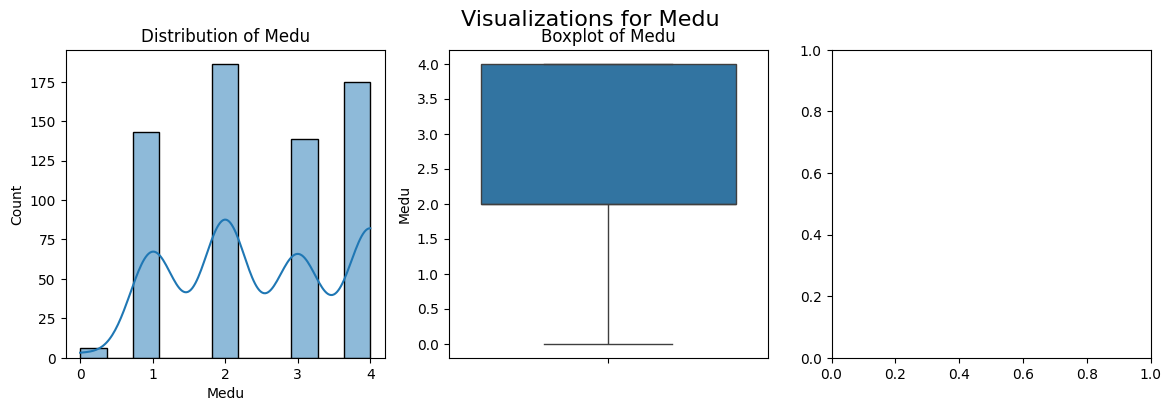

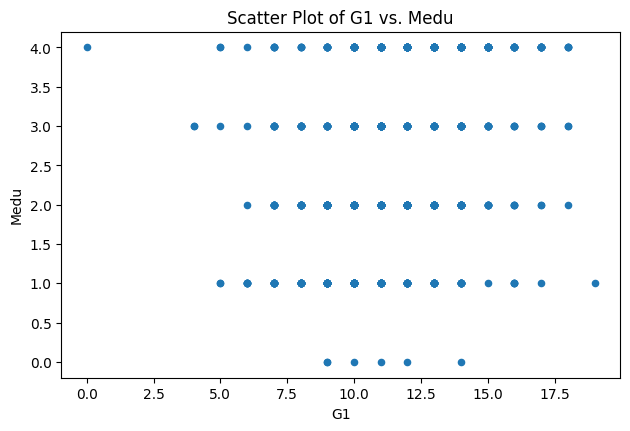

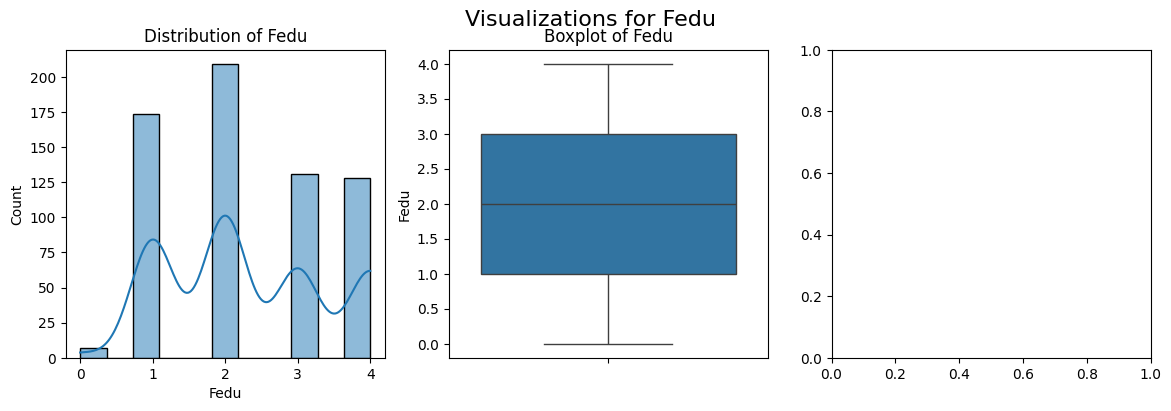

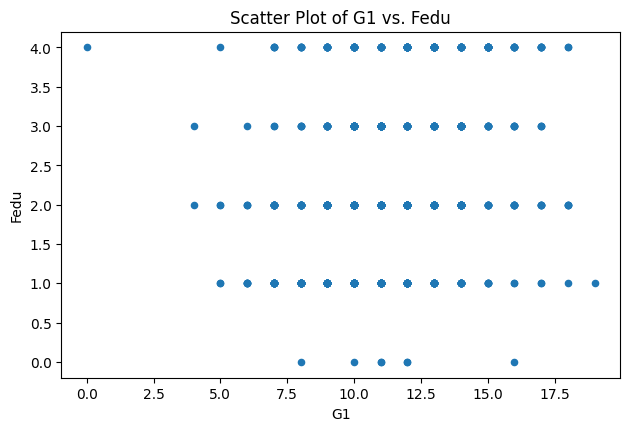

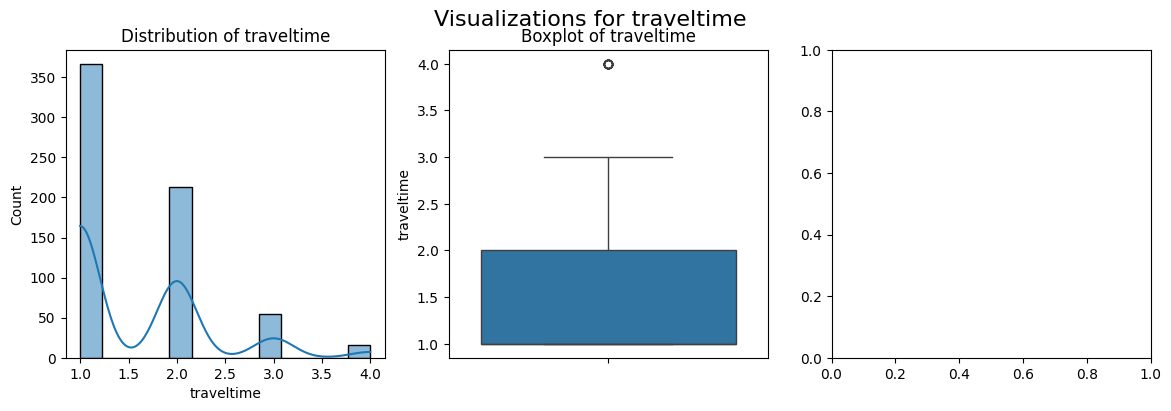

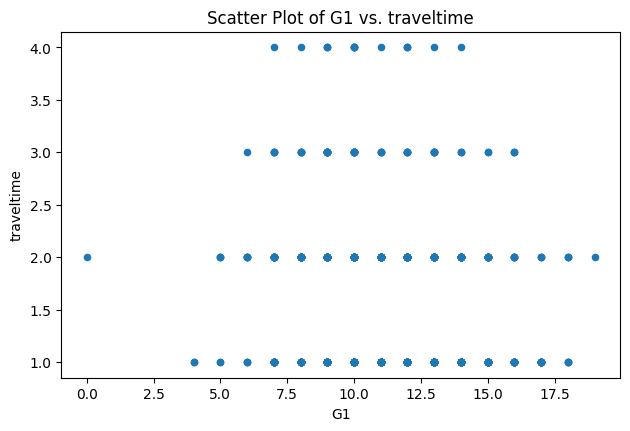

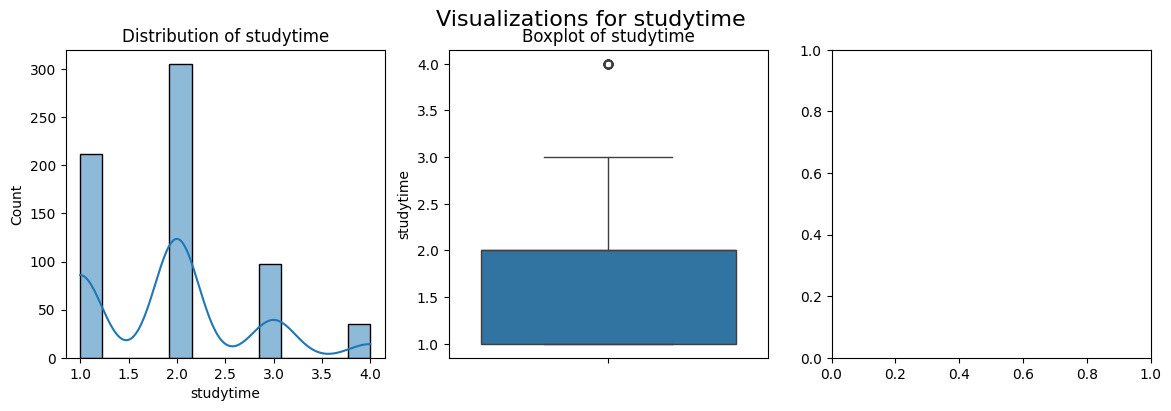

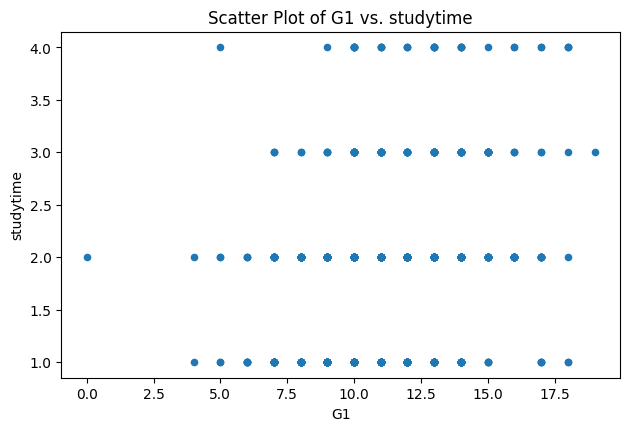

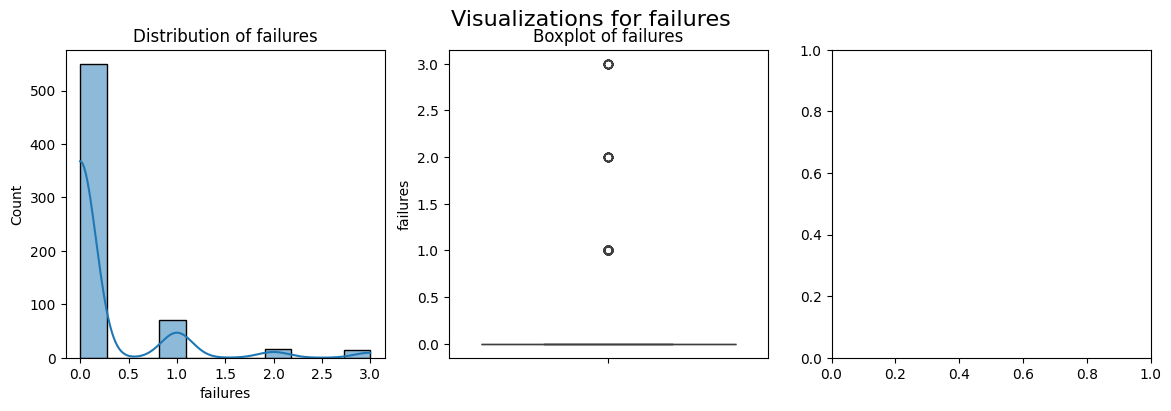

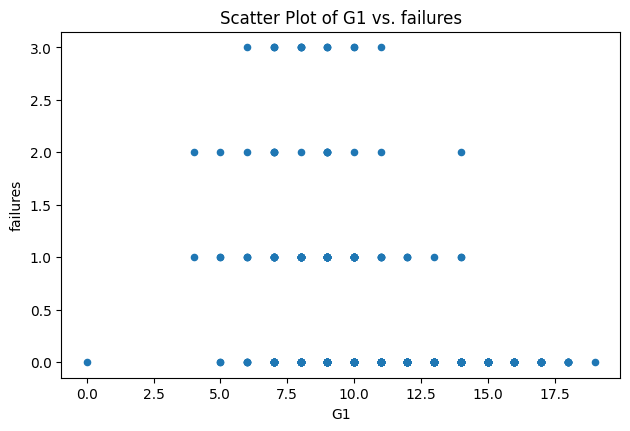

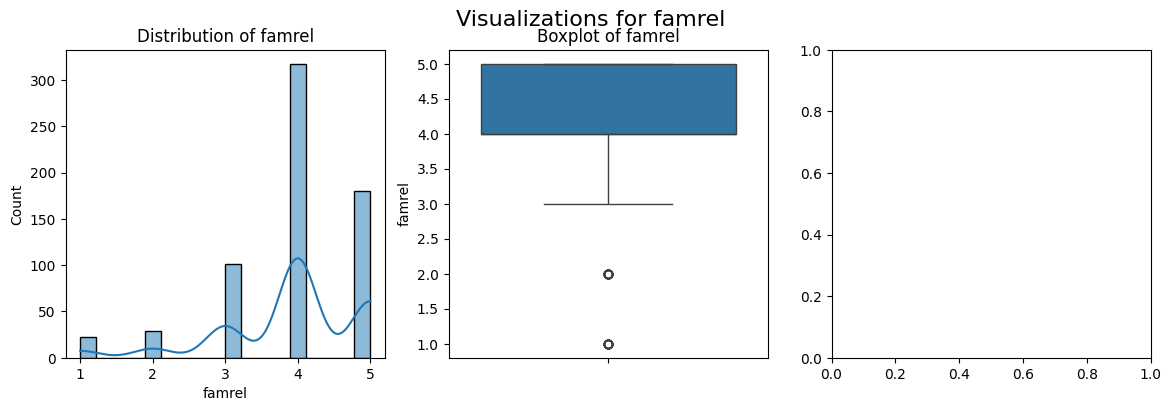

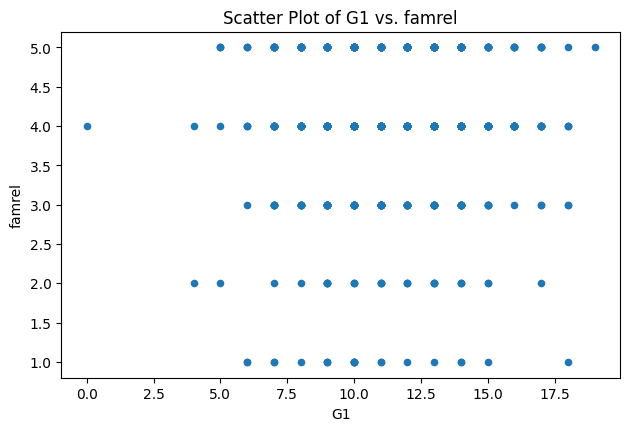

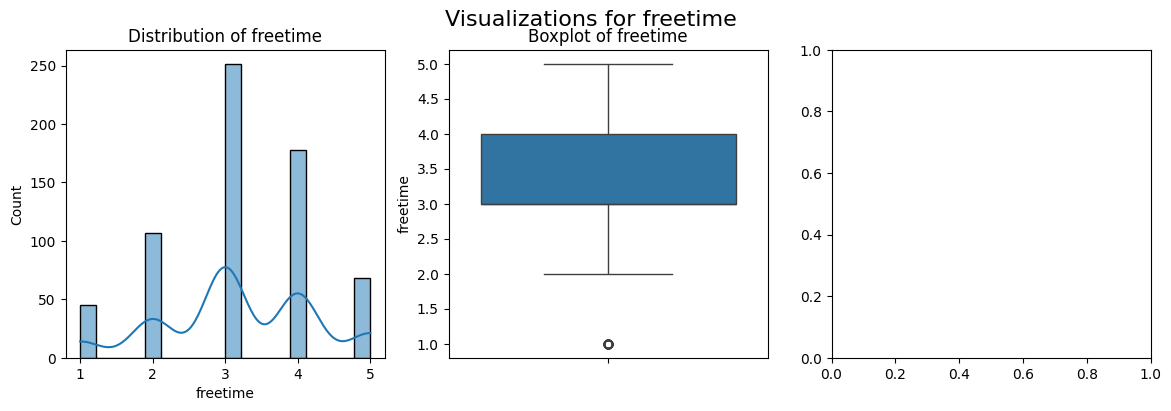

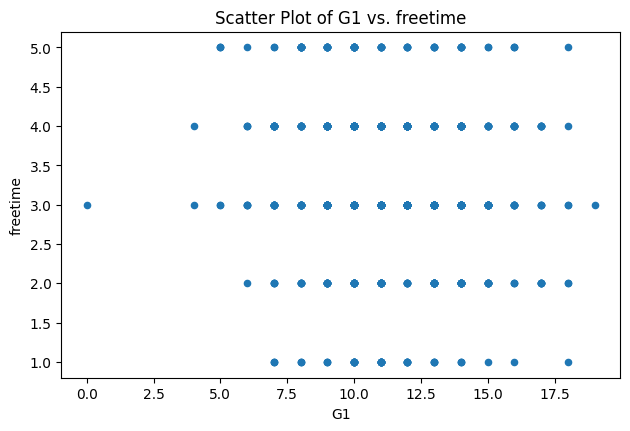

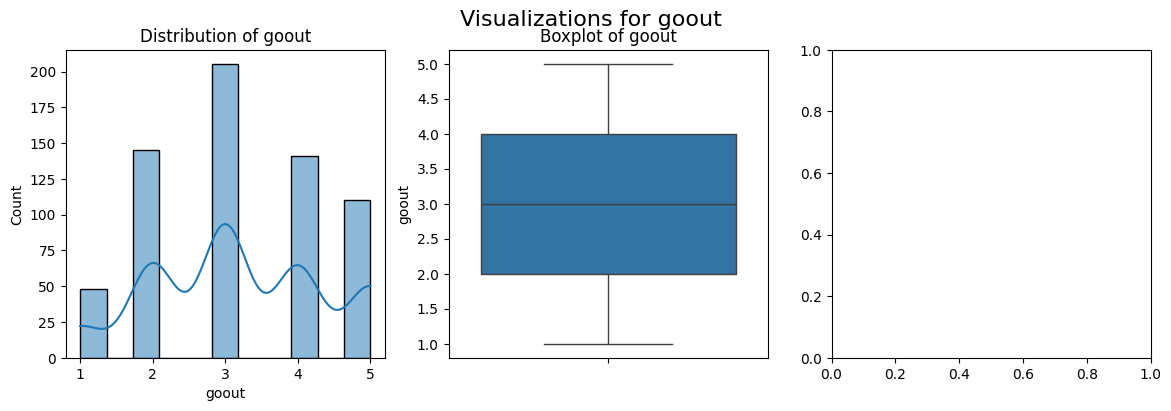

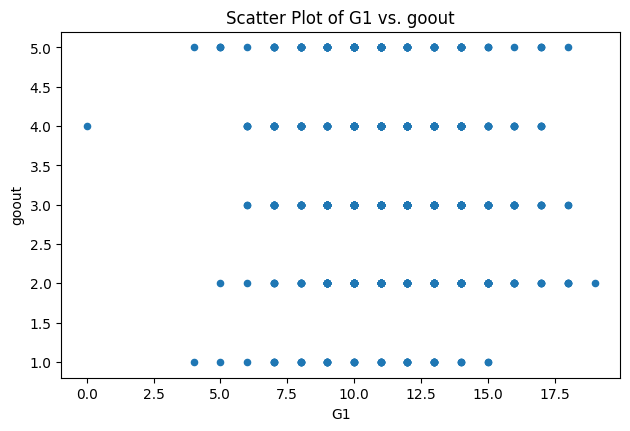

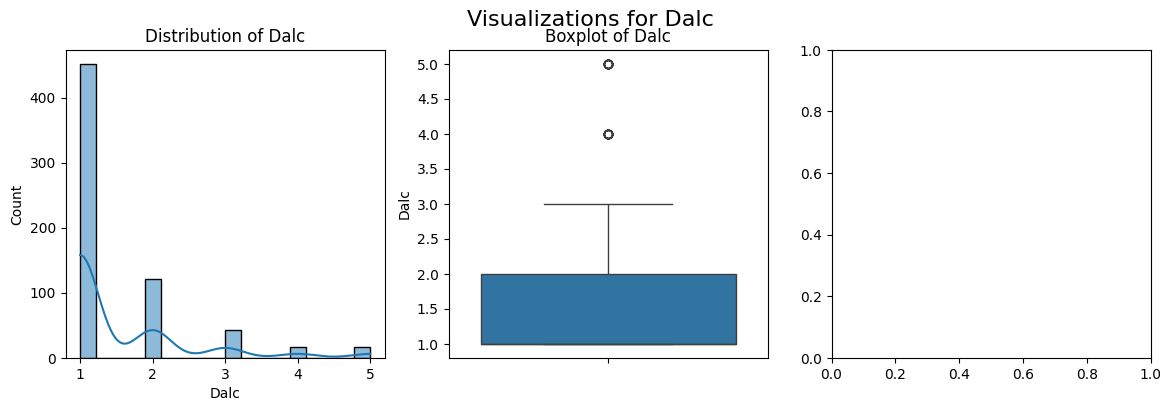

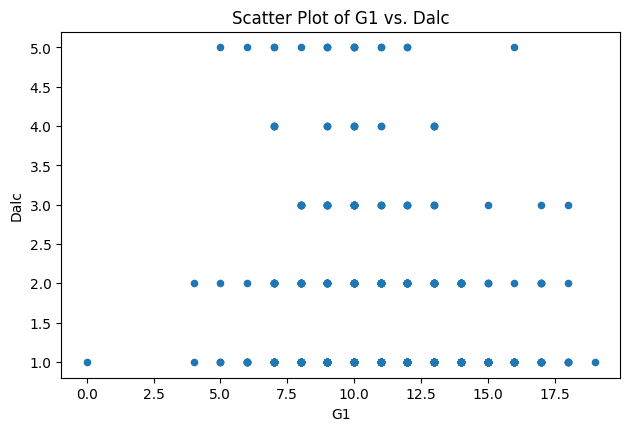

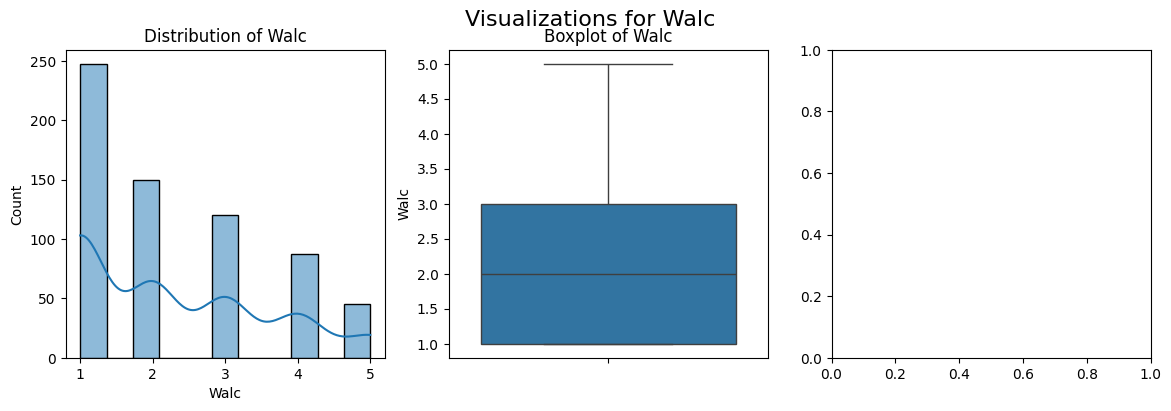

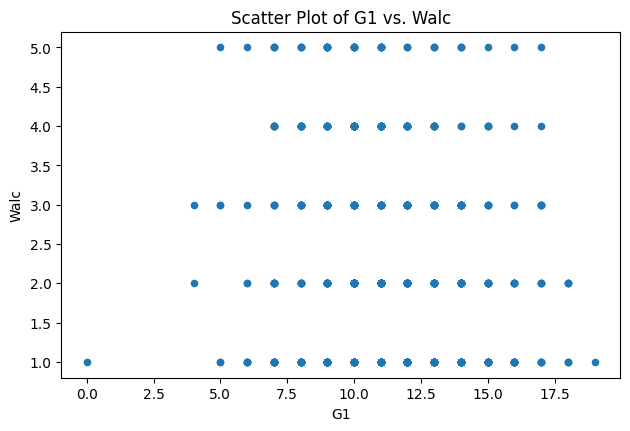

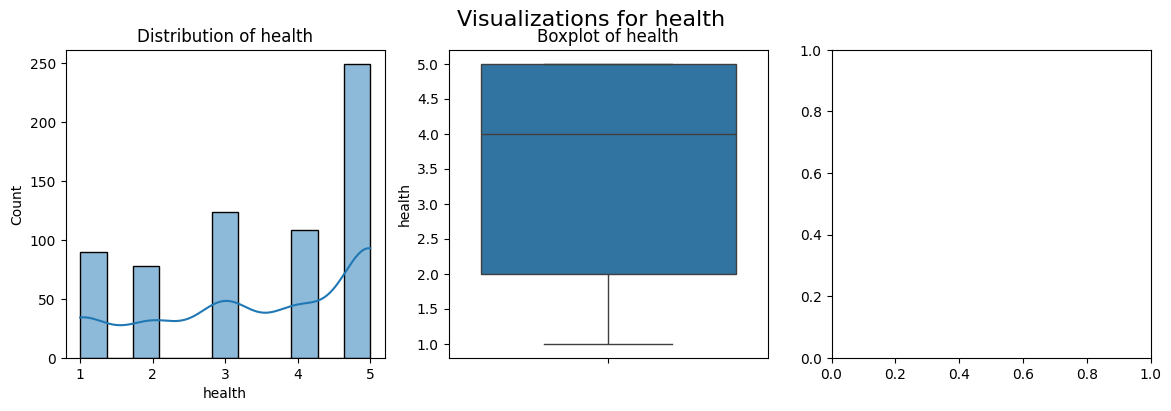

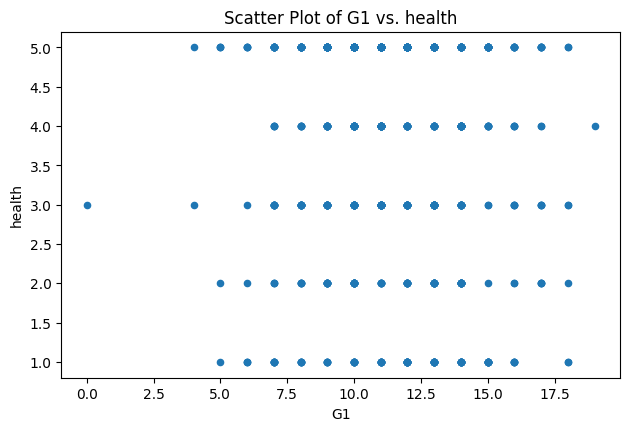

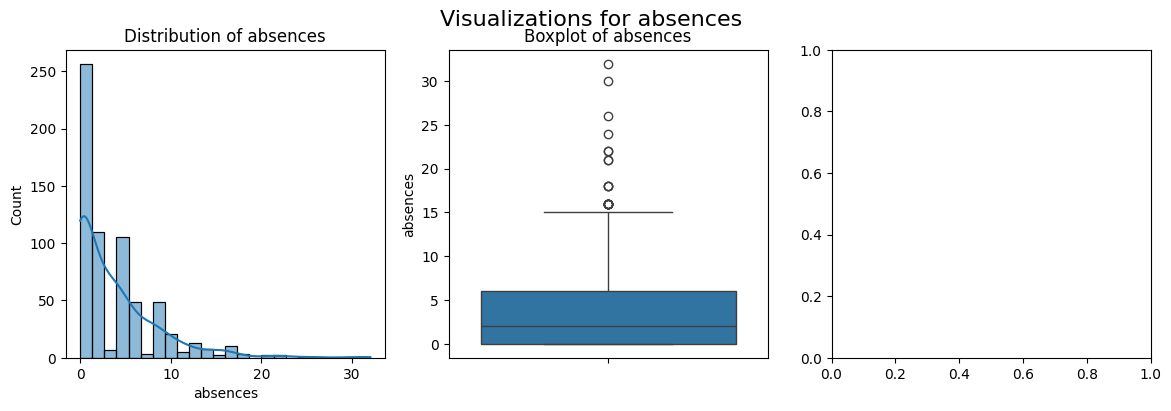

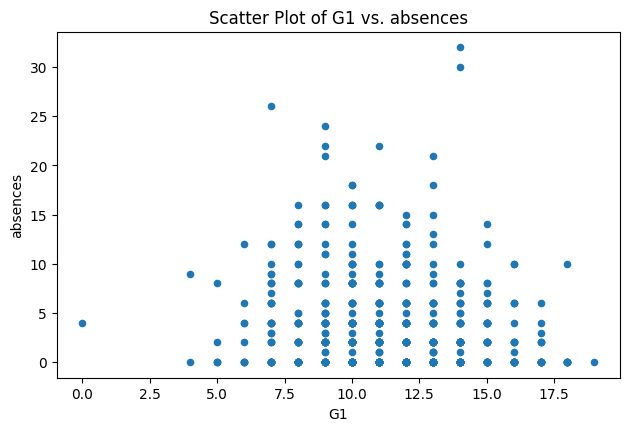

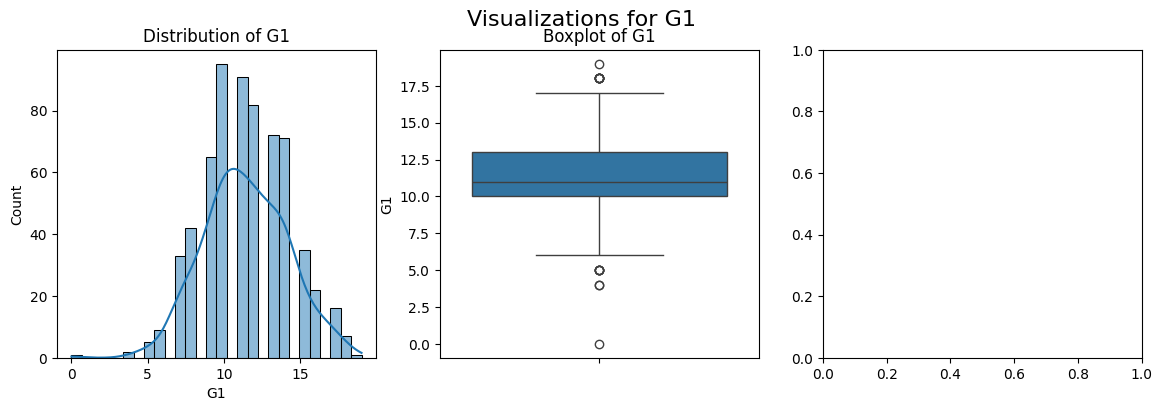

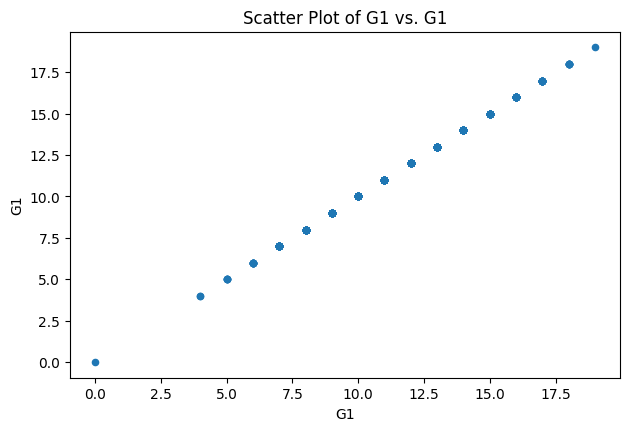

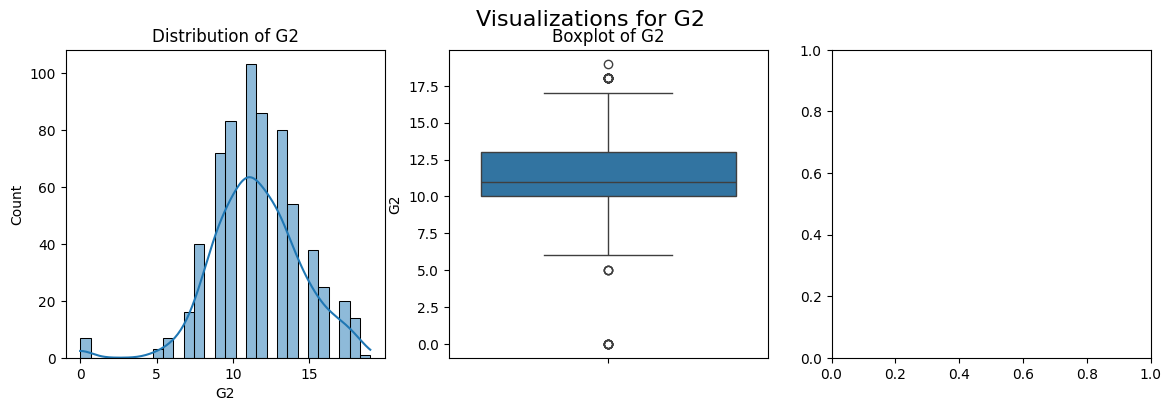

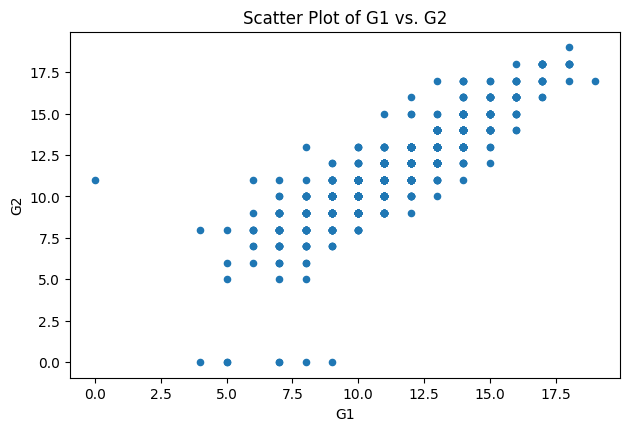

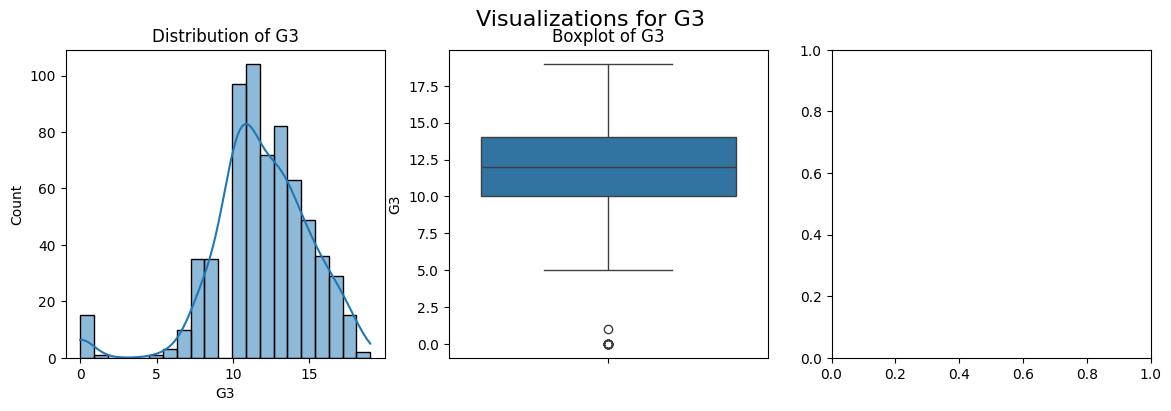

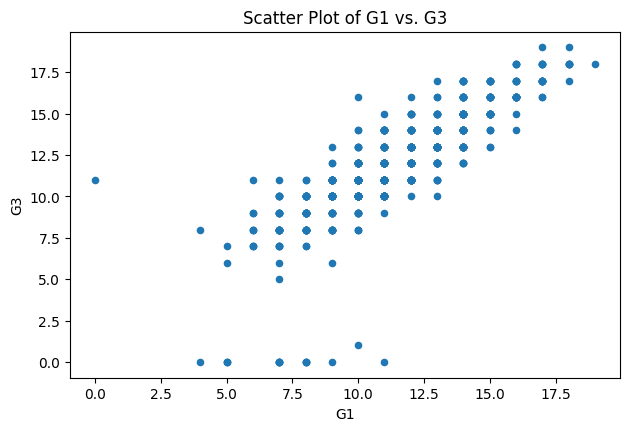

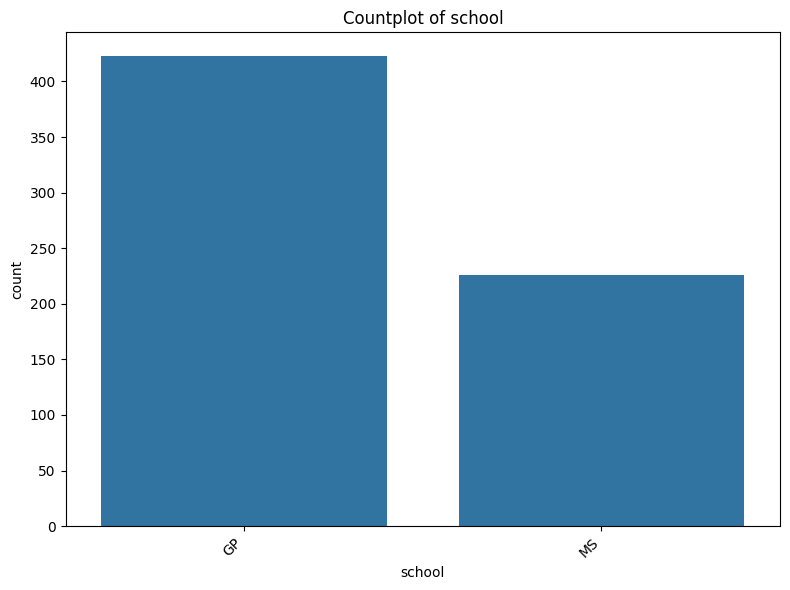

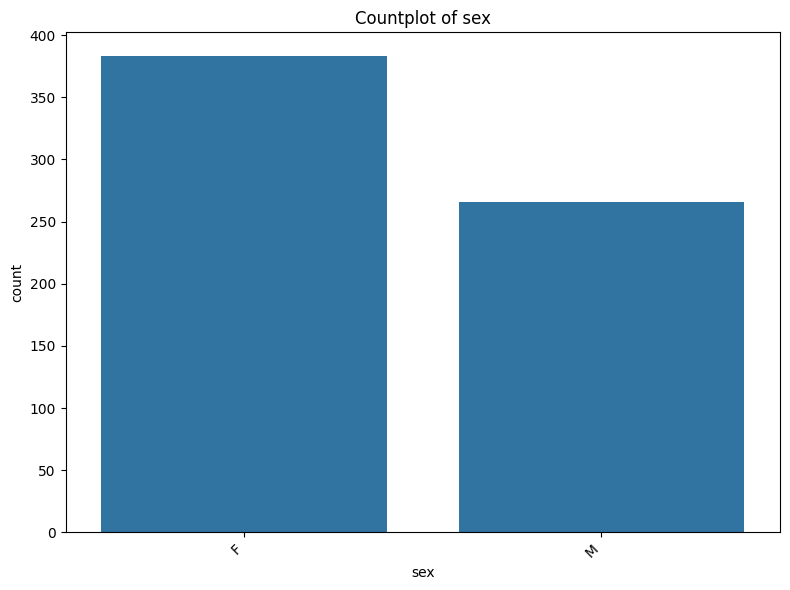

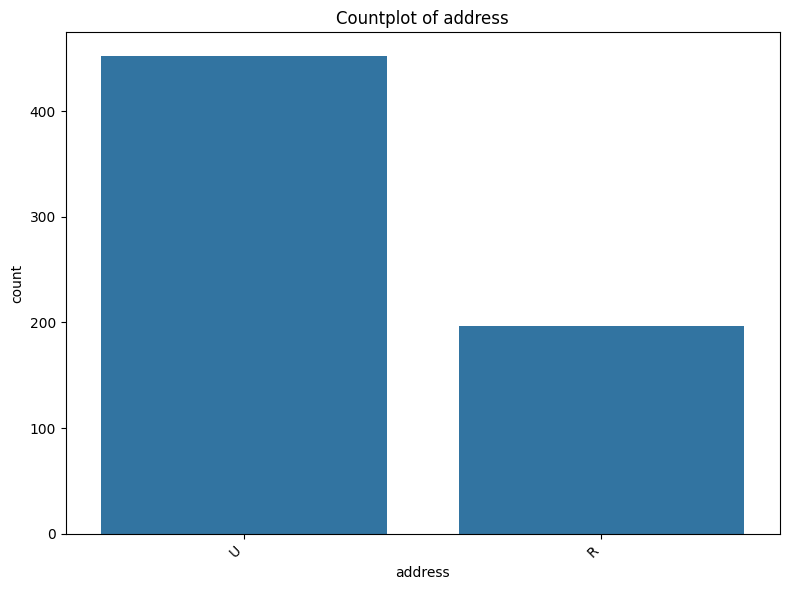

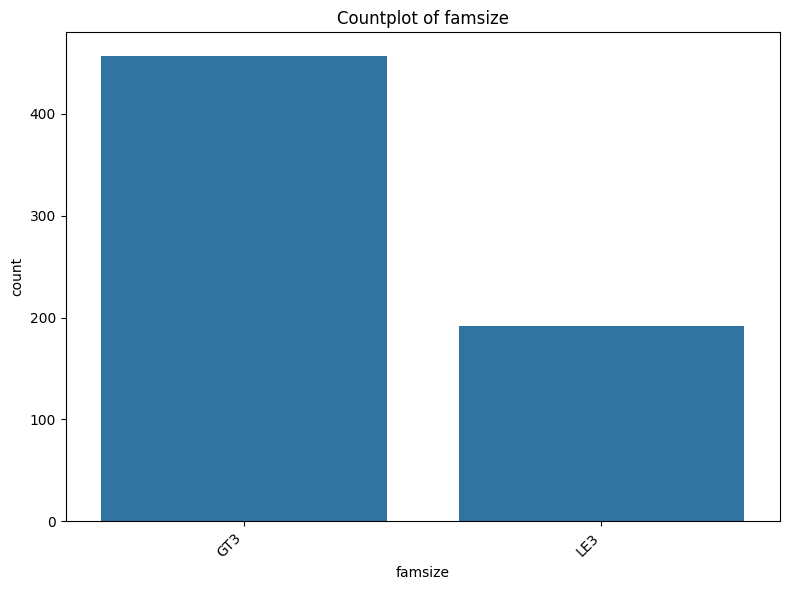

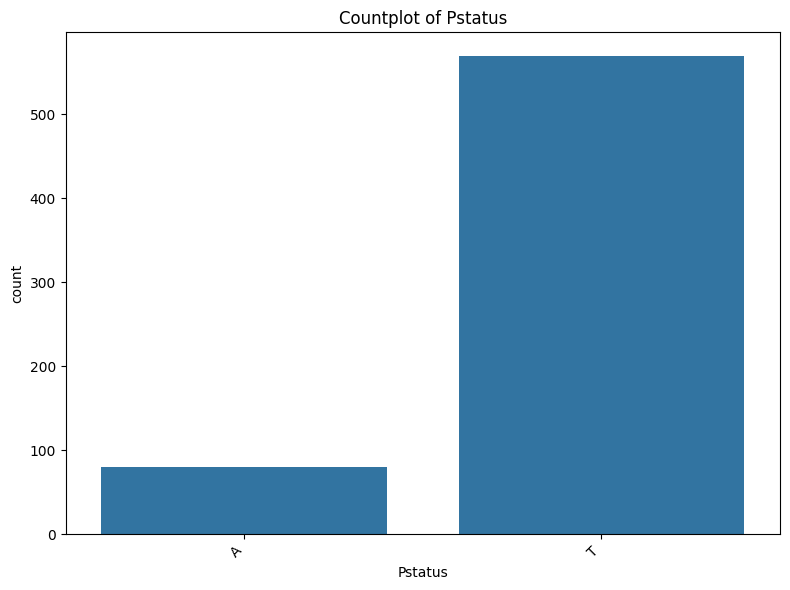

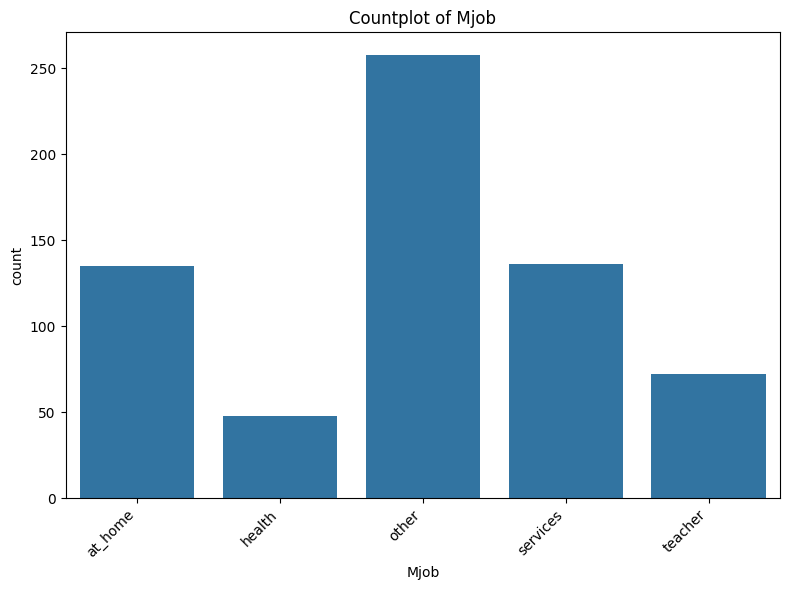

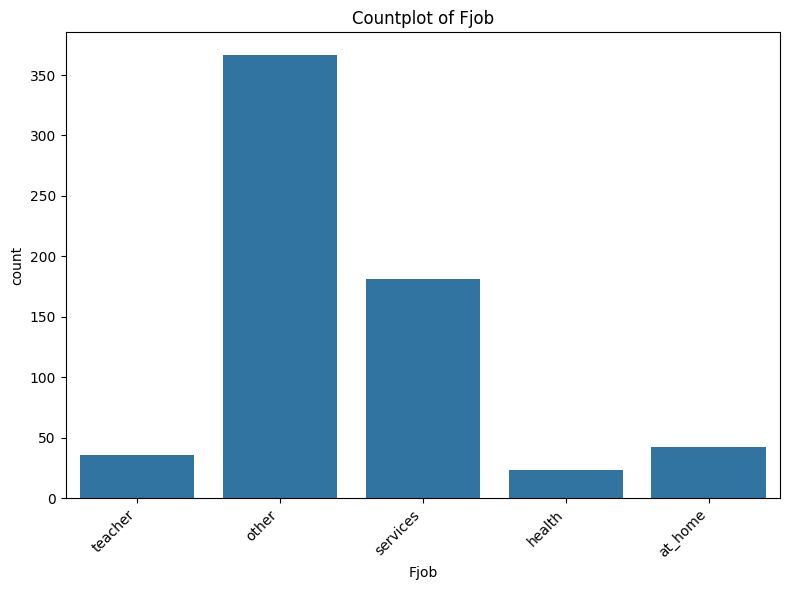

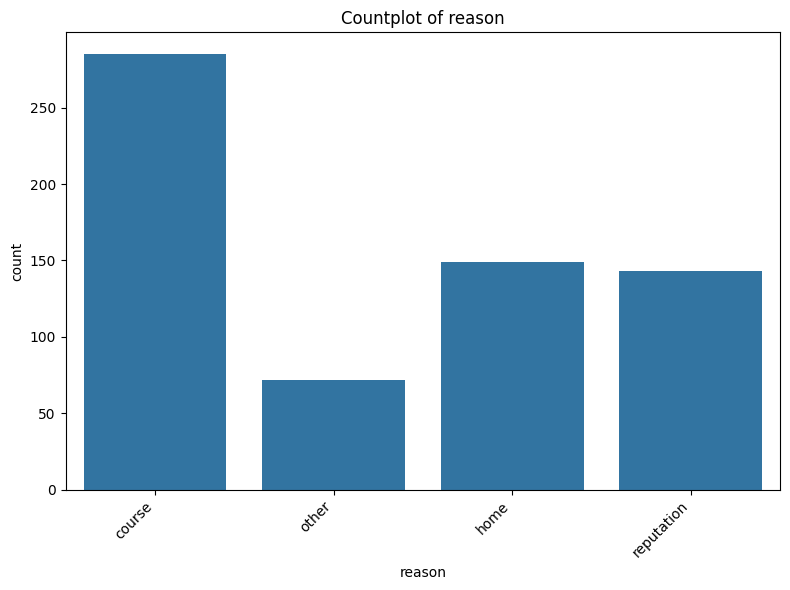

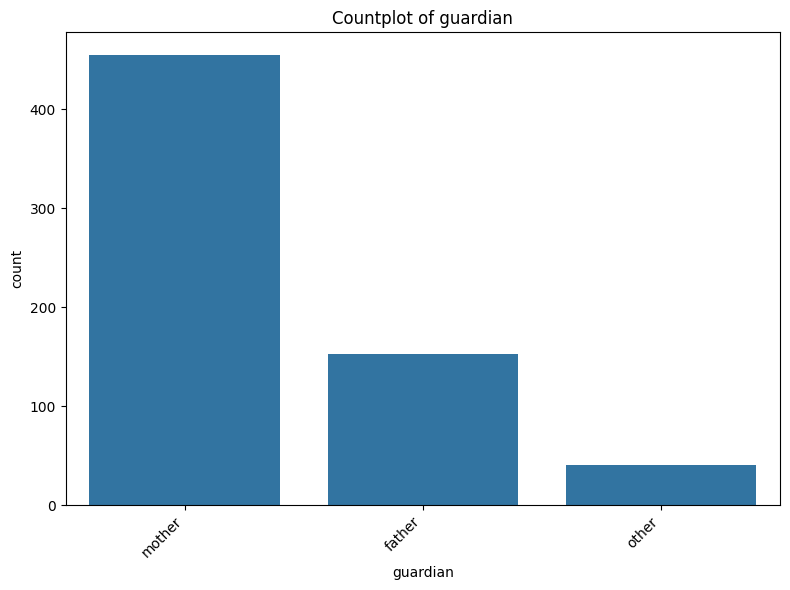

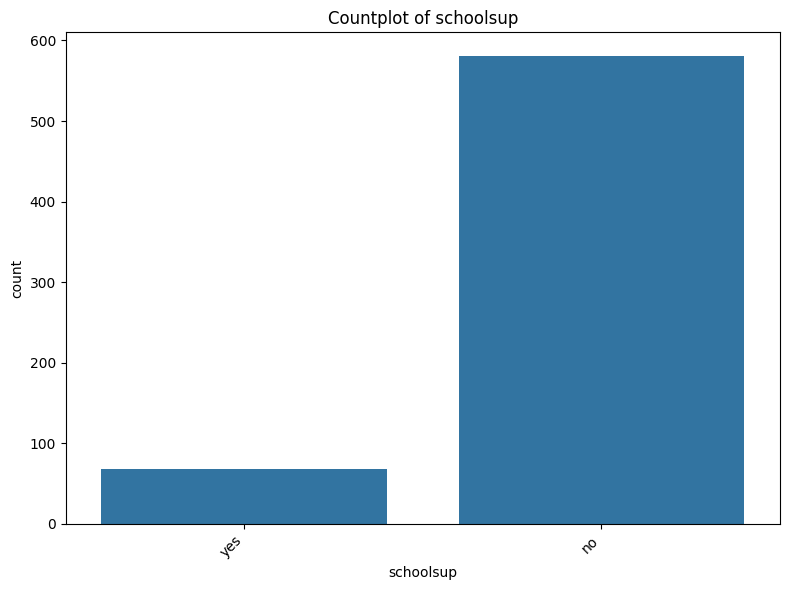

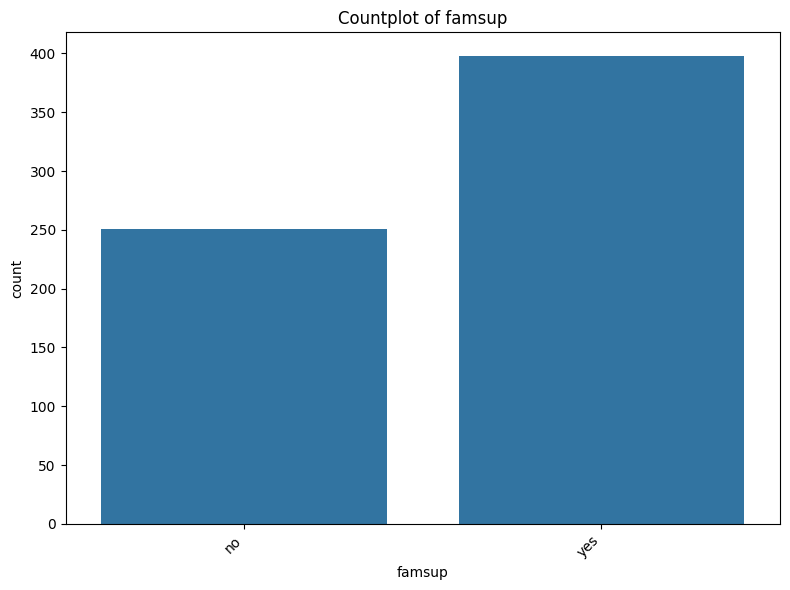

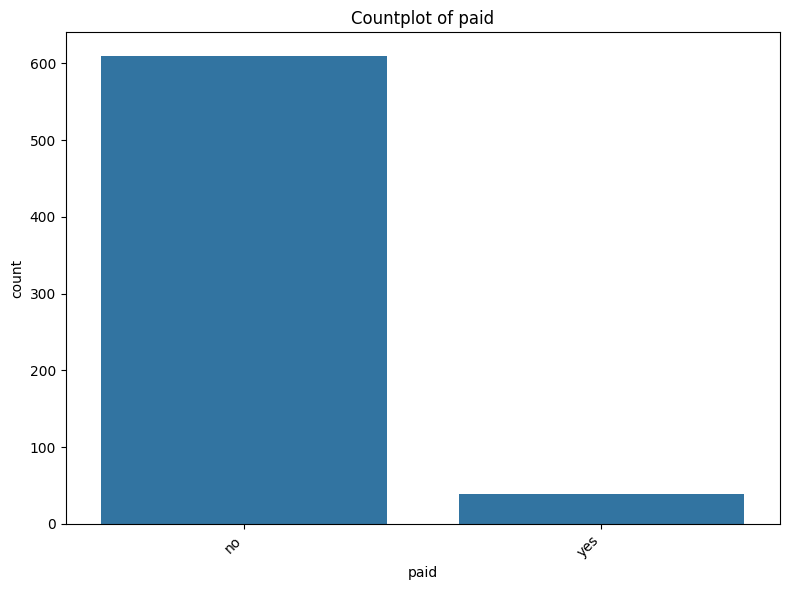

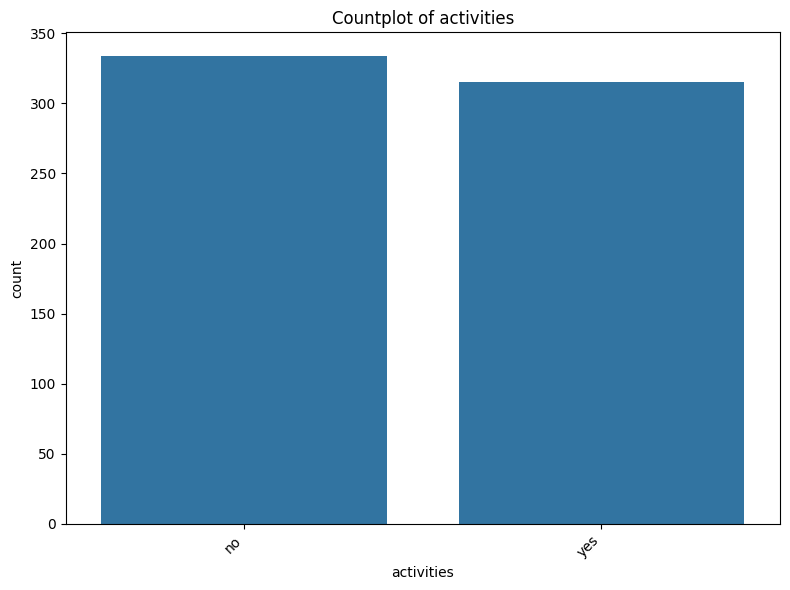

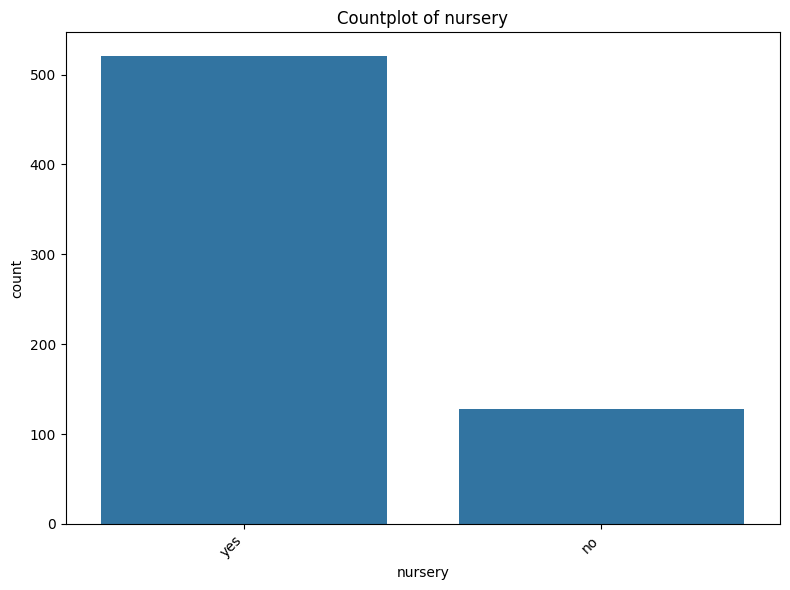

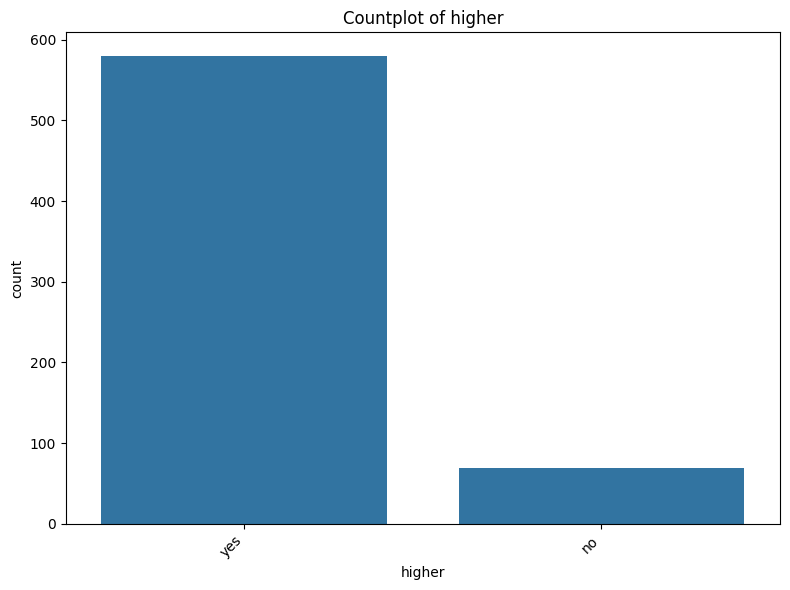

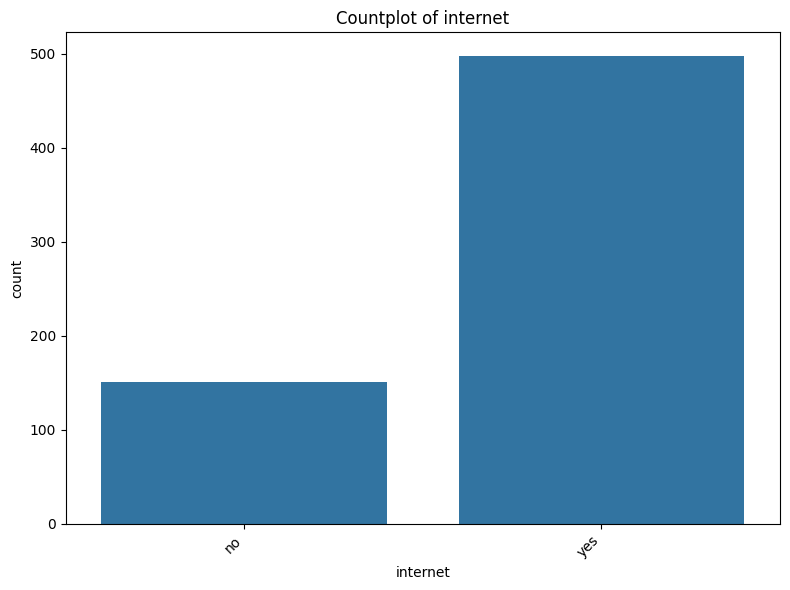

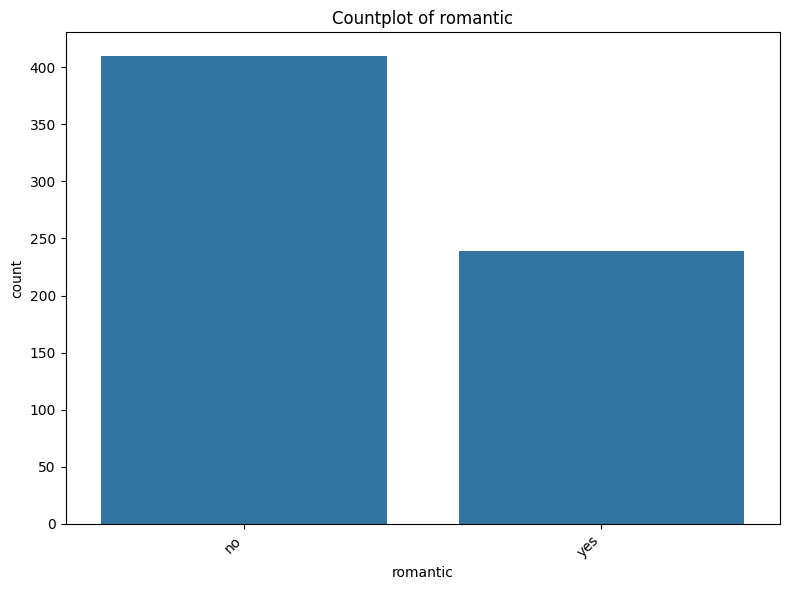

In [ ]:

# Identify numerical and categorical columns
numerical_cols = df.select_dtypes(include=np.number).columns
categorical_cols = df.select_dtypes(exclude=np.number).columns

# Loop through numerical columns and create visualizations
for col in numerical_cols:
    plt.figure(figsize=(14, 4))  # Adjust figure size for better layout
    plt.suptitle(f'Visualizations for {col}', fontsize=16)

    plt.subplot(1, 3, 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')

    plt.subplot(1, 3, 2)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')

    plt.subplot(1, 3, 3)
    df.plot(x='G1', y=col, kind='scatter') # Example using 'G1' - replace with relevant column if different
    plt.title(f'Scatter Plot of G1 vs. {col}') # Update title accordingly

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Loop through categorical columns and create visualizations (example: countplots)
for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=df[col])
    plt.title(f'Countplot of {col}')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
    plt.tight_layout()
    plt.show()


In [ ]:

# Regression Tasks (using G1, G2 as predictors for G3)
# Prepare data for regression
X = df_no_outliers[['G1', 'G2']]
y = df_no_outliers['G3']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 1. Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
print("Linear Regression:")
print("Mean Squared Error:", mean_squared_error(y_test, lr_pred))
print("R-squared:", r2_score(y_test, lr_pred))
print("-" * 60)

# 2. Ridge Regression
ridge = Ridge(alpha=1.0)  # You can tune the alpha parameter
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)
print("Ridge Regression:")
print("Mean Squared Error:", mean_squared_error(y_test, ridge_pred))
print("R-squared:", r2_score(y_test, ridge_pred))
print("-" * 60)

# 3. Lasso Regression
lasso = Lasso(alpha=1.0)  # You can tune the alpha parameter
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)
print("Lasso Regression:")
print("Mean Squared Error:", mean_squared_error(y_test, lasso_pred))
print("R-squared:", r2_score(y_test, lasso_pred))
print("-" * 60)

# prompt: all regression model

# 4. Support Vector Regression (SVR)
from sklearn.svm import SVR

svr = SVR(kernel='linear') # You can try different kernels ('rbf', 'poly', etc.)
svr.fit(X_train, y_train)
svr_pred = svr.predict(X_test)
print("Support Vector Regression:")
print("Mean Squared Error:", mean_squared_error(y_test, svr_pred))
print("R-squared:", r2_score(y_test, svr_pred))
print("-" * 60)


# 5. Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)
dtr_pred = dtr.predict(X_test)
print("Decision Tree Regression:")
print("Mean Squared Error:", mean_squared_error(y_test, dtr_pred))
print("R-squared:", r2_score(y_test, dtr_pred))
print("-" * 60)


# 6. Random Forest Regression
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=100) # You can adjust the number of estimators
rfr.fit(X_train, y_train)
rfr_pred = rfr.predict(X_test)
print("Random Forest Regression:")
print("Mean Squared Error:", mean_squared_error(y_test, rfr_pred))
print("R-squared:", r2_score(y_test, rfr_pred))
print("-" * 60)

# 7. K-Nearest Neighbors Regression
from sklearn.neighbors import KNeighborsRegressor

knnr = KNeighborsRegressor(n_neighbors=5) # You can adjust the number of neighbors
knnr.fit(X_train, y_train)
knnr_pred = knnr.predict(X_test)
print("K-Nearest Neighbors Regression:")
print("Mean Squared Error:", mean_squared_error(y_test, knnr_pred))
print("R-squared:", r2_score(y_test, knnr_pred))
print("-" * 60)




Linear Regression:
Mean Squared Error: 0.7241840682899089
R-squared: 0.8517933041305659
------------------------------------------------------------
Ridge Regression:
Mean Squared Error: 0.7240204947607768
R-squared: 0.8518267800013367
------------------------------------------------------------
Lasso Regression:
Mean Squared Error: 0.7915728449326308
R-squared: 0.8380019652124293
------------------------------------------------------------
Support Vector Regression:
Mean Squared Error: 0.7467892093486079
R-squared: 0.8471670862770255
------------------------------------------------------------
Decision Tree Regression:
Mean Squared Error: 0.8495959137993511
R-squared: 0.8261273497693584
------------------------------------------------------------
Random Forest Regression:
Mean Squared Error: 0.8156586229013495
R-squared: 0.8330727300545528
------------------------------------------------------------
K-Nearest Neighbors Regression:
Mean Squared Error: 0.8854237288135592
R-squared: 0.81

In [ ]:
import pandas as pd
from scipy.stats import mode
import numpy as np

# Load your dataset
df = pd.read_csv("/content/student-por.csv")

# Select numerical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns

# Calculate and print statistics
for col in numerical_cols:
    col_data = df[col].dropna()  # Handle missing values if any
    mean_val = col_data.mean()
    median_val = col_data.median()
    mode_val = col_data.mode().values[0] if not col_data.mode().empty else np.nan
    var_val = col_data.var()
    range_val = col_data.max() - col_data.min()
    std_dev_val = col_data.std()
    skewness = col_data.skew()
    kurtosis = col_data.kurt()

    print(f"\nStatistics for {col}:")
    print(f"Mean: {mean_val}")
    print(f"Median: {median_val}")
    print(f"Mode: {mode_val}")
    print(f"Variance: {var_val}")
    print(f"Range: {range_val}")
    print(f"Standard Deviation: {std_dev_val}")
    print(f"Skewness: {skewness}")
    print(f"Kurtosis: {kurtosis}")



Statistics for age:
Mean: 16.7442218798151
Median: 17.0
Mode: 17
Variance: 1.483859308718057
Range: 7
Standard Deviation: 1.2181376394800618
Skewness: 0.4167953798111204
Kurtosis: 0.07150858494933487

Statistics for Medu:
Mean: 2.514637904468413
Median: 2.0
Mode: 2
Variance: 1.287208240598065
Range: 4
Standard Deviation: 1.1345519999533142
Skewness: -0.029950358081110445
Kurtosis: -1.2606193193690842

Statistics for Fedu:
Mean: 2.3066255778120186
Median: 2.0
Mode: 2
Variance: 1.2098480092830395
Range: 4
Standard Deviation: 1.099930911140804
Skewness: 0.21534336325478984
Kurtosis: -1.1092413844724942

Statistics for traveltime:
Mean: 1.568567026194145
Median: 1.0
Mode: 1
Variance: 0.5604919248987013
Range: 3
Standard Deviation: 0.748660086353414
Skewness: 1.2476475492990087
Kurtosis: 1.1088649540584097

Statistics for studytime:
Mean: 1.9306625577812018
Median: 2.0
Mode: 2
Variance: 0.6880861344138248
Range: 3
Standard Deviation: 0.8295095746366191
Skewness: 0.6996192054467889
Kurtosis

Skewness of age: 0.4167953798111204
Kurtosis of age: 0.07150858494933487


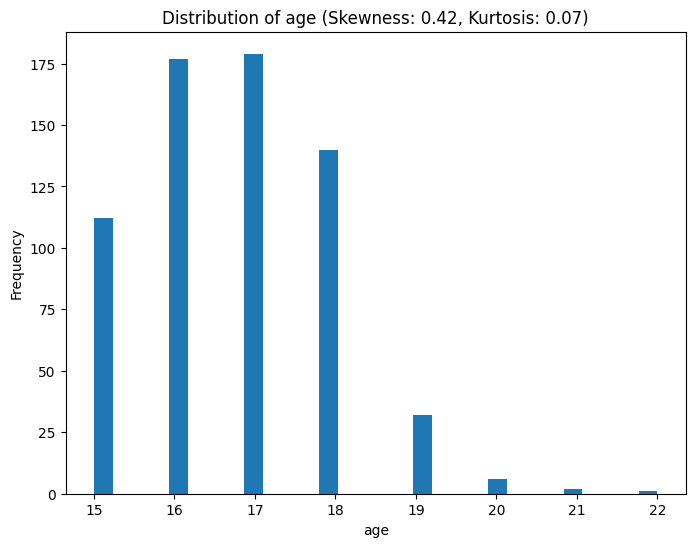

Skewness of Medu: -0.029950358081110445
Kurtosis of Medu: -1.2606193193690842


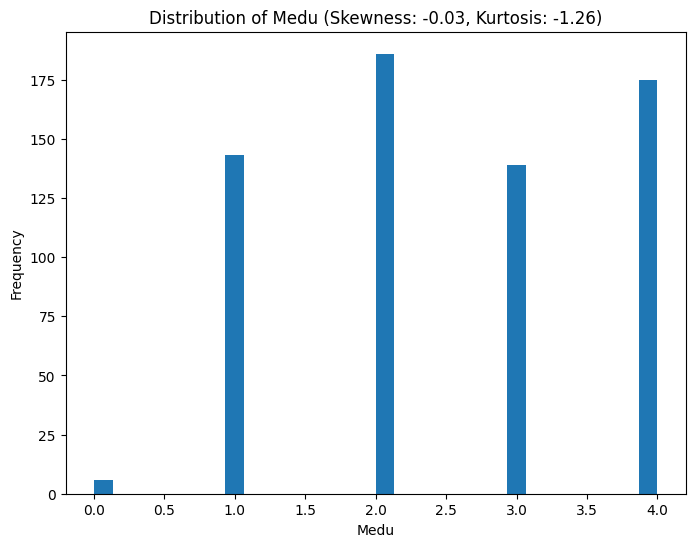

Skewness of Fedu: 0.21534336325478984
Kurtosis of Fedu: -1.1092413844724942


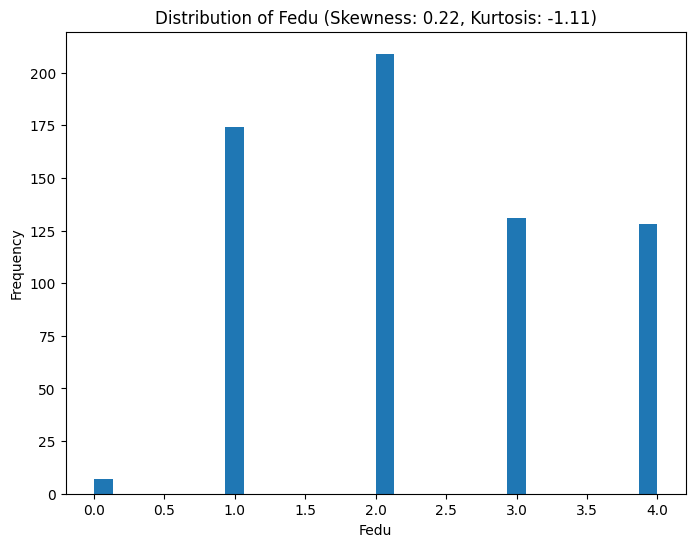

Skewness of traveltime: 1.2476475492990087
Kurtosis of traveltime: 1.1088649540584097


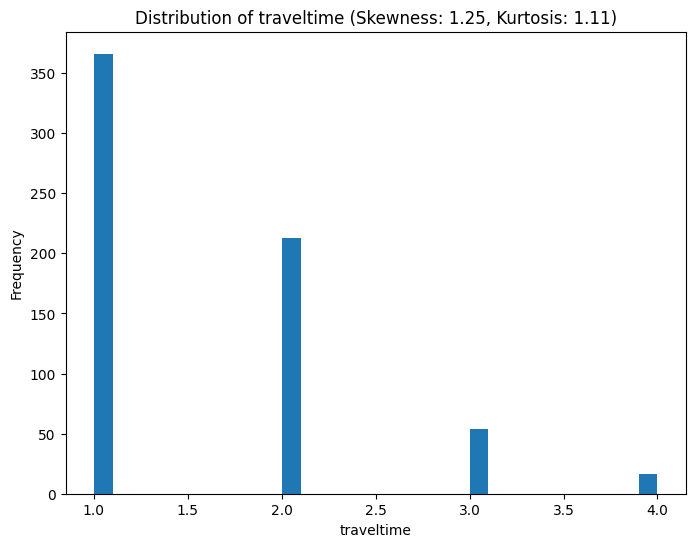

Skewness of studytime: 0.6996192054467889
Kurtosis of studytime: 0.03784612702530943


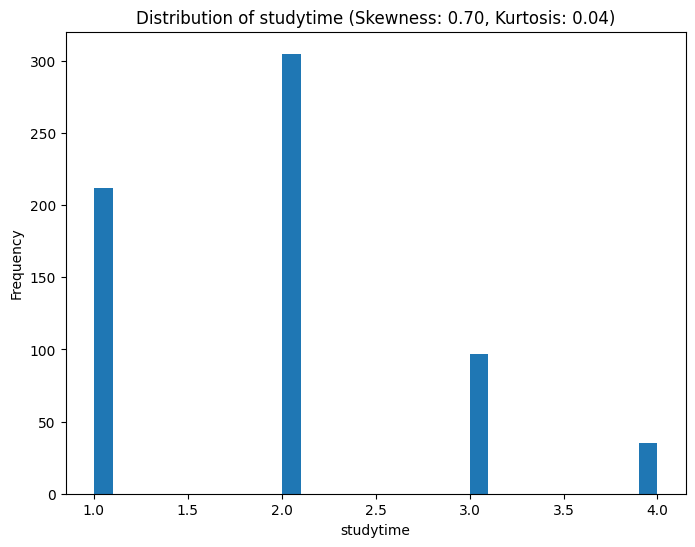

Skewness of failures: 3.092698960847477
Kurtosis of failures: 9.824408582632877


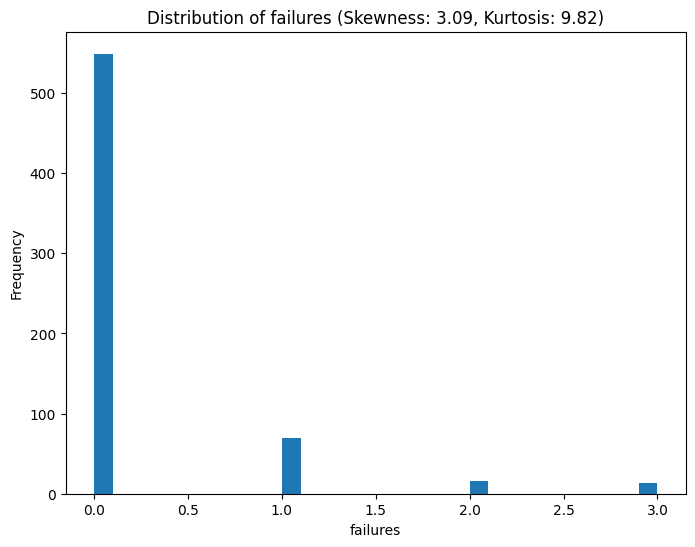

Skewness of famrel: -1.1059340909420583
Kurtosis of famrel: 1.3489725829219301


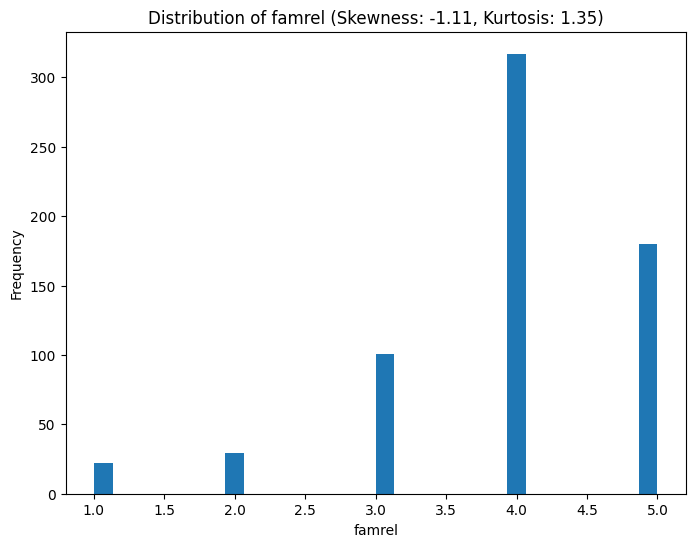

Skewness of freetime: -0.1812774790934117
Kurtosis of freetime: -0.3969588251952243


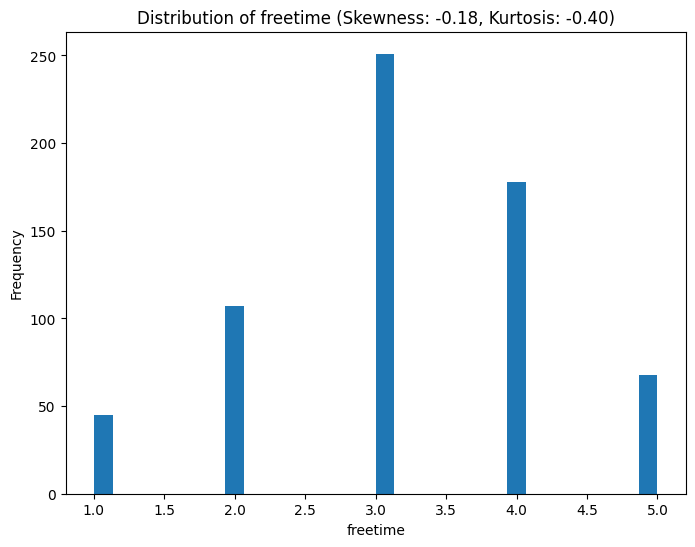

Skewness of goout: -0.008579903539792107
Kurtosis of goout: -0.8654537522799943


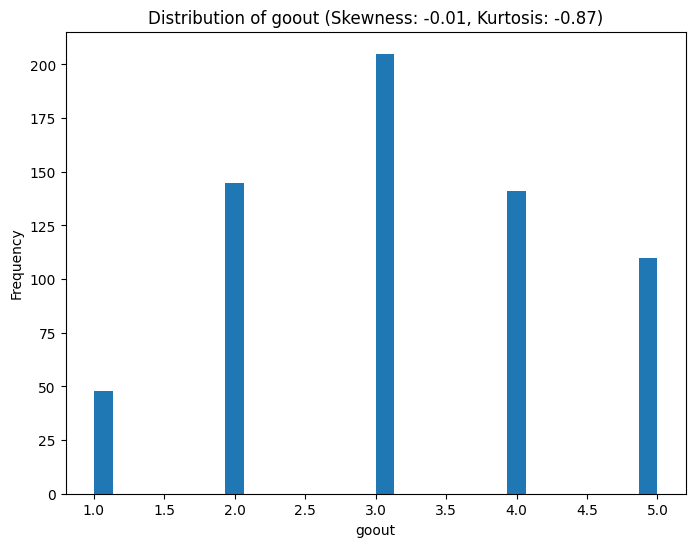

Skewness of Dalc: 2.141913360367646
Kurtosis of Dalc: 4.3492974717455715


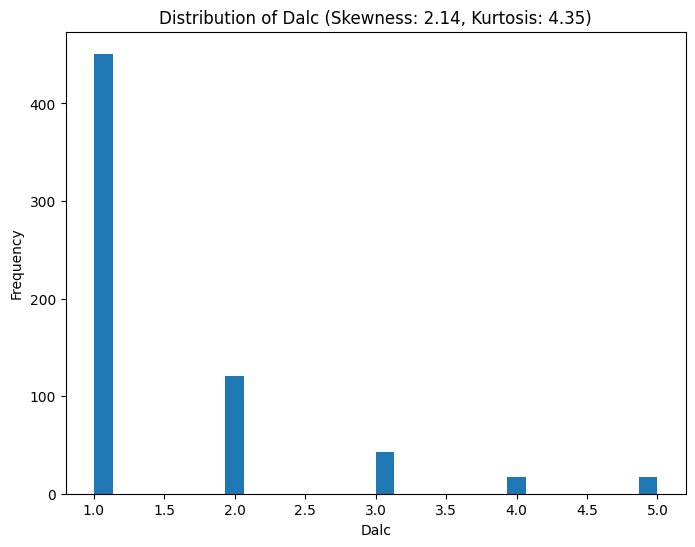

Skewness of Walc: 0.6359042701186859
Kurtosis of Walc: -0.7706892185419245


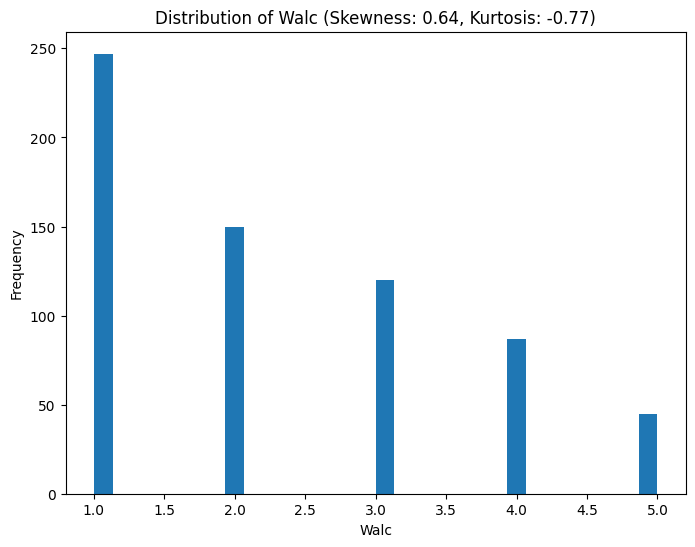

Skewness of health: -0.5006561886039521
Kurtosis of health: -1.121175092029219


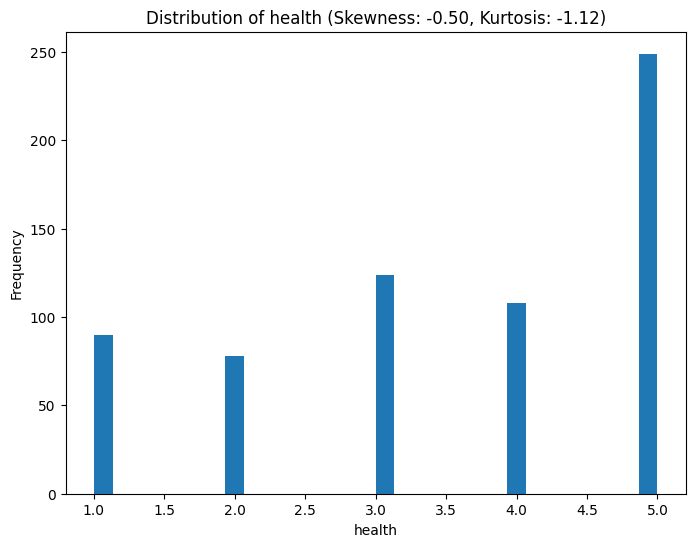

Skewness of absences: 2.020693704014018
Kurtosis of absences: 5.781077639181336


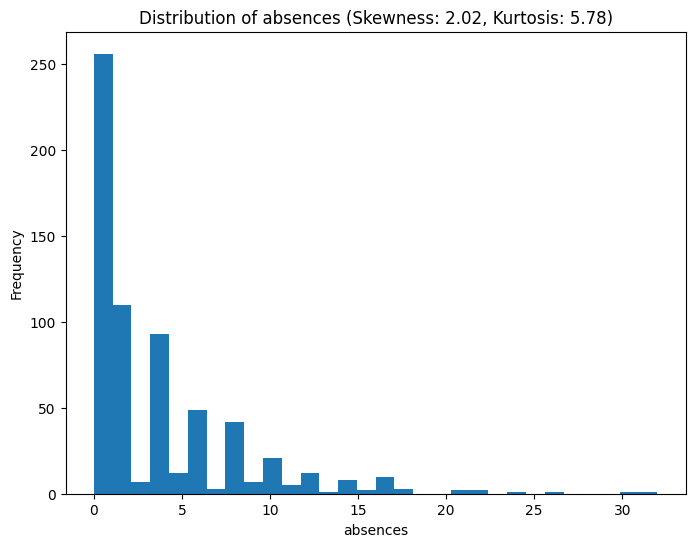

Skewness of G1: -0.0027736368904273173
Kurtosis of G1: 0.036638230479381306


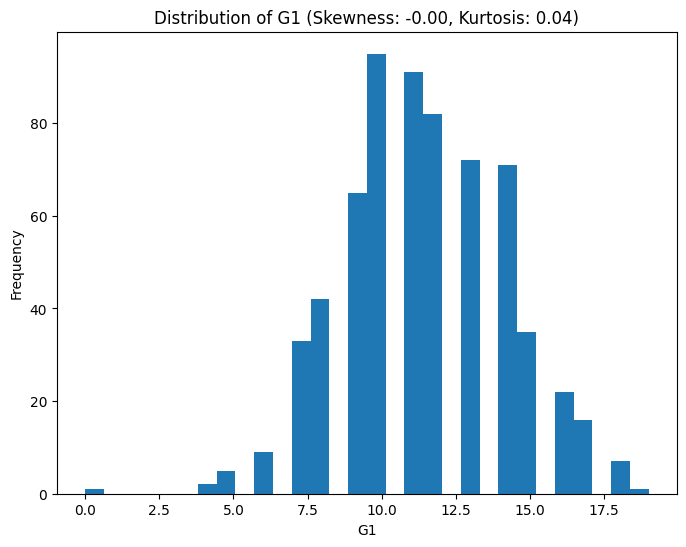

Skewness of G2: -0.3602826464466586
Kurtosis of G2: 1.6624647500937524


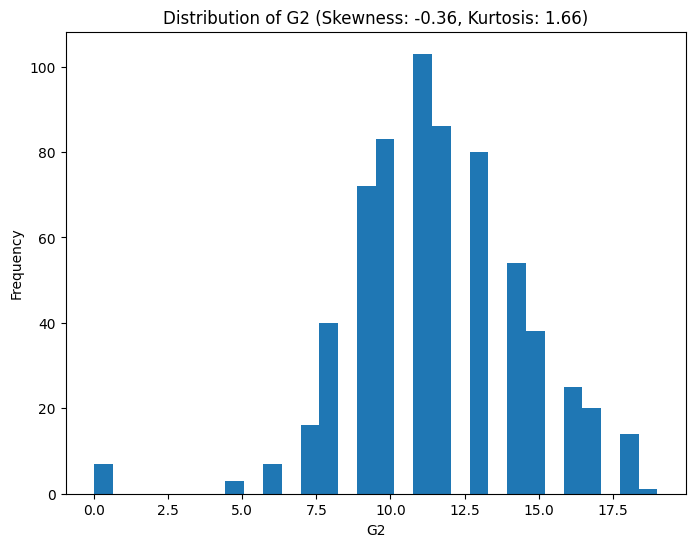

Skewness of G3: -0.9129093547157225
Kurtosis of G3: 2.7122043191041723


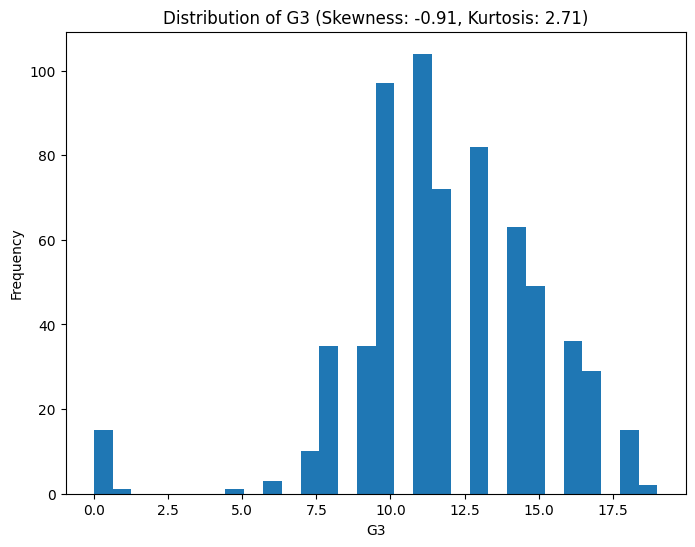

In [ ]:
# prompt: skewness and kutosis code with graphs

# Calculate skewness and kurtosis for numerical features
for col in numerical_cols:
    skewness = df[col].skew()
    kurtosis = df[col].kurt()
    print(f"Skewness of {col}: {skewness}")
    print(f"Kurtosis of {col}: {kurtosis}")

    # Visualize skewness and kurtosis (optional)
    plt.figure(figsize=(8, 6))
    plt.hist(df[col], bins=30)
    plt.title(f'Distribution of {col} (Skewness: {skewness:.2f}, Kurtosis: {kurtosis:.2f})')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


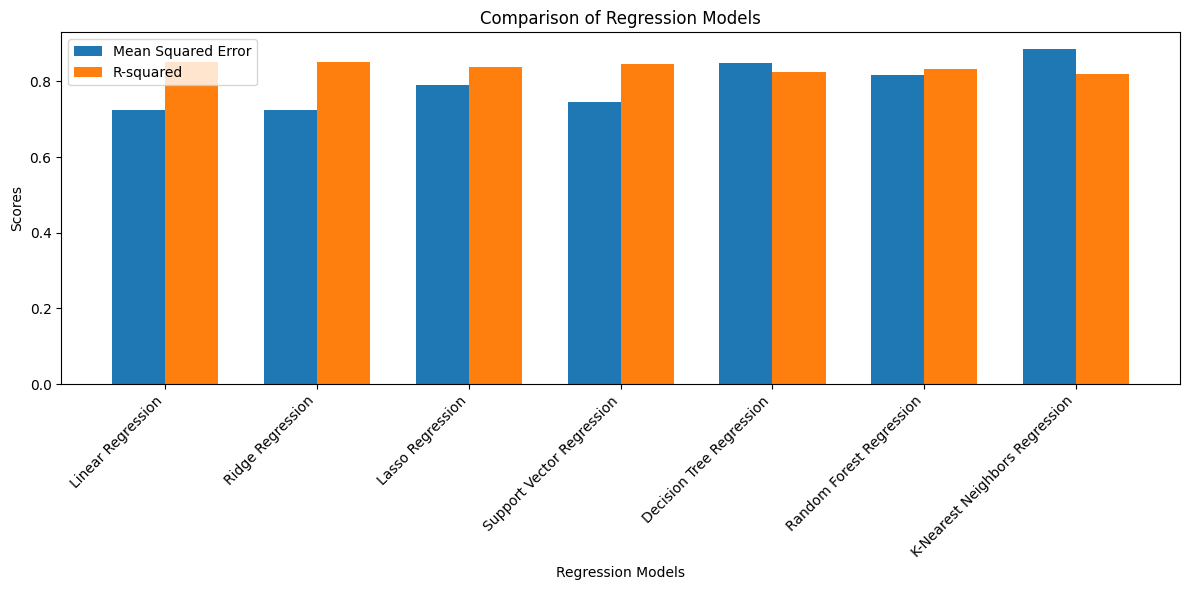

In [ ]:


import matplotlib.pyplot as plt

models = ['Linear Regression', 'Ridge Regression', 'Lasso Regression',
          'Support Vector Regression', 'Decision Tree Regression',
          'Random Forest Regression', 'K-Nearest Neighbors Regression']
mse_values = [0.7241840682899089, 0.7240204947607768, 0.7915728449326308,
              0.7467892093486079, 0.8495959137993511, 0.8156586229013495,
              0.8854237288135592]
r2_values = [0.8517933041305659, 0.8518267800013367, 0.8380019652124293,
             0.8471670862770255, 0.8261273497693584, 0.8330727300545528,
             0.8187950673898027]

# Create the bar graph
plt.figure(figsize=(12, 6))
bar_width = 0.35
index = range(len(models))

plt.bar(index, mse_values, bar_width, label='Mean Squared Error')
plt.bar([i + bar_width for i in index], r2_values, bar_width, label='R-squared')

plt.xlabel('Regression Models')
plt.ylabel('Scores')
plt.title('Comparison of Regression Models')
plt.xticks([i + bar_width / 2 for i in index], models, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()
